<h1 align="center"> <b> Customer lead generator: EDA </b> </h1>

<img src="images/pngegg.png" width="200px" />

### Table of Contents
------
* [Introduction](https://github.com/Leeky18/Coding_assignment/blob/main/EDA.ipynb#introduction)
* [Preparation and loading data](#preparation-and-loading-data)
* [Checking the data](#checking-the-data)
* [Data cleaning](#data-cleaning)
* [Data insights and visualisations](#dData-insights-and-visualisations)
* [Correlations](#correlations)
* [Export clean data](#export-clean-data)

### Introduction
------

Stakeholder instruction:
>Customer lead generator
The columns ‘b_in_kontakt_gewesen’, ‘b_gekauft_gesamt’ will help you to identify the training
data and the labels.

Provided data:
>CustomerData_LeadGenerator.csv

Next step:
In this notebook, the exploratory data analysis (EDA) is performed based on the given data and further assumptions

### Preparation and loading data
------

In [1]:
# Import libraries

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
import numpy as np

In [2]:
# Load the data from CSV file

df = pd.read_csv("data/CustomerData_LeadGenerator.csv")

### Checking the data
------

In [62]:
df.head()

,fakeID,b_specialisation_i,b_specialisation_h,b_specialisation_g,b_specialisation_f,b_specialisation_e,b_specialisation_d,b_specialisation_c,b_specialisation_b,b_specialisation_a,...,q_5th Quint by Total HH,q_2017 Purchasing Power: Per Capita,q_2017 Total Population,"q_2017 Pop 15+/Edu: University, Fachhochschule",q_Uni by Total Pop,q_2017 Personal Care: Per Capita,q_2017 Medical Products: Per Capita,q_2017 Personal Effects: Per Capita,b_in_kontakt_gewesen,b_gekauft_gesamt
0,1069_7334,0,0,0,0,0,0,0,0,0,...,0.186735,23730.35,2194057,324656,0.147971,593.19,326.28,235.75,1,1
1,328_2350,0,0,0,1,1,1,0,0,0,...,0.179848,23343.26,1966798,281130,0.142938,588.54,320.36,230.66,1,1
2,865_6285,0,0,0,1,0,1,0,0,0,...,0.184935,23674.18,2149624,320326,0.149015,592.88,325.57,234.82,1,1
3,47_307,0,1,1,0,0,0,0,0,0,...,0.184523,23572.26,2161445,310981,0.143876,590.84,324.06,233.81,1,0
4,342_2513,0,0,0,0,0,1,0,0,0,...,0.189871,23821.63,2302959,334940,0.145439,593.56,327.75,237.41,1,1


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3773 entries, 0 to 3772
Data columns (total 26 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   fakeID                                          3773 non-null   object 
 1   b_specialisation_i                              3773 non-null   int64  
 2   b_specialisation_h                              3773 non-null   int64  
 3   b_specialisation_g                              3773 non-null   int64  
 4   b_specialisation_f                              3773 non-null   int64  
 5   b_specialisation_e                              3773 non-null   int64  
 6   b_specialisation_d                              3773 non-null   int64  
 7   b_specialisation_c                              3773 non-null   int64  
 8   b_specialisation_b                              3773 non-null   int64  
 9   b_specialisation_a                       

In [277]:
df.describe(include="all")

,fakeID,b_specialisation_i,b_specialisation_h,b_specialisation_g,b_specialisation_f,b_specialisation_e,b_specialisation_d,b_specialisation_c,b_specialisation_b,b_specialisation_a,...,q_5th Quint by Total HH,q_2017 Purchasing Power: Per Capita,q_2017 Total Population,"q_2017 Pop 15+/Edu: University, Fachhochschule",q_Uni by Total Pop,q_2017 Personal Care: Per Capita,q_2017 Medical Products: Per Capita,q_2017 Personal Effects: Per Capita,b_in_kontakt_gewesen,b_gekauft_gesamt
count,3773,3773.000000,3773.000000,3773.000000,3773.000000,3773.000000,3773.000000,3773.000000,3773.000000,3773.000000,...,3773.000000,3773.000000,3.773000e+03,3773.000000,3773.000000,3773.000000,3773.000000,3773.000000,3773.000000,3773.000000
unique,3773,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,1069_7334,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,0.218129,0.224225,0.254704,0.111582,0.285449,0.005566,0.002650,0.020408,0.138616,...,0.197419,23170.651983,8.257315e+05,111252.936920,0.101737,574.247339,326.438110,234.848630,0.025179,0.015107
std,NaN,0.413030,0.417126,0.435753,0.314894,0.451688,0.074407,0.051421,0.141411,0.345592,...,0.024973,1147.978703,8.565966e+05,131837.721022,0.039749,22.966321,11.135183,11.018168,0.156689,0.121996
min,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.100814,19171.140000,3.807000e+03,172.000000,0.027974,490.390000,270.110000,196.450000,0.000000,0.000000
25%,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.184566,22662.050000,1.780610e+05,11431.000000,0.063095,560.130000,322.380000,231.310000,0.000000,0.000000
50%,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.195882,23627.240000,3.417850e+05,39282.000000,0.101592,584.000000,325.860000,235.290000,0.000000,0.000000
75%,NaN,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,...,0.213667,23839.540000,2.023342e+06,298968.000000,0.145630,592.520000,331.930000,238.000000,0.000000,0.000000


In [109]:
df["q_OpeningDays"].describe()

count    3773.000000
mean        3.230586
std         2.070304
min         0.000000
25%         0.000000
50%         4.000000
75%         5.000000
max         7.000000
Name: q_OpeningDays, dtype: float64

In [19]:
df.nunique()

fakeID                                            3772
b_specialisation_i                                   2
b_specialisation_h                                   2
b_specialisation_g                                   2
b_specialisation_f                                   2
b_specialisation_e                                   2
b_specialisation_d                                   2
b_specialisation_c                                   2
b_specialisation_b                                   2
b_specialisation_a                                   2
b_specialisation_j                                   2
q_OpeningDays                                        8
q_OpeningHours                                     116
q_2017 Average Household Size                       10
q_2017 Total Households                           3438
q_2017 HHs: 5th Quintile (68.759 and above)       3378
q_5th Quint by Total HH                           3460
q_2017 Purchasing Power: Per Capita               3430
q_2017 Tot

* The columns *q_2017 Medical Products: Per Capita* and *b_specialisation* leads to the assumption of investigating medical practices as potential customers. This would fit to Zeiss Microscopy, providing microscopy solutions for medical healthcare institutions. In this case, different specialisations of the practices, their opening times and the local households (size, educational background, etc.) as well as medical data of the local population are given
* There are no Null elements in the data
* *q_OpeningDays* lies between 1 and 7, which makes sense (Monday to Sunday)
* Only *fakeID* and *q_OpeningHours* are object types
* *fakeID* seems to be an unique identifier. It might only be called "fake", because the actual IDs should not be published
* *b_specialisation_(a to j)*, *b_in_kontakt_gewesen* and *b_gekauft_gesamt* are binary categorical values, 0 and 1. *b_gekauft_gesamt* seems to be the target variable leading to the conclusion that the model will be a binary classifier

In [73]:
df.groupby(["b_in_kontakt_gewesen","b_gekauft_gesamt"])["fakeID"].count()

b_in_kontakt_gewesen  b_gekauft_gesamt
0                     0                   3678
1                     0                     38
                      1                     57
Name: fakeID, dtype: int64

In [10]:
df["b_in_kontakt_gewesen"].sum()/df.shape[0] * 100

2.517890272992314

* There are no leads without *b_in_kontakt_gewesen* equal to 1, which makes sense: 0 means no, 1 means yes. Without contacting a medical practice, no purchase can be made. Only 95 medical practices (~ 2.5%) were contacted: 38 did not buy, whereas 57 did buy the offered product. The 95 observations can therefore be used as training data and *b_in_kontakt_gewesen* equal to zero as test data. Since the test data set is extremely small, it would make sense to consider the test data as labelled and the training data as unlabelled. The real train and test split would be done with the labelled data only. The exact procedure is described in the notebook [Preprocessing and Model](/Preprocessing_and_Model.ipynb)

In [72]:
# Investigating the reason for "object" as data type in q_OpeningHours. Is there a alphabetic element, if yes, where?

df[df["q_OpeningHours"].str.isalpha()].index
df.iloc[2099]

fakeID                                            363_2645
b_specialisation_i                                       0
b_specialisation_h                                       1
b_specialisation_g                                       0
b_specialisation_f                                       0
b_specialisation_e                                       1
b_specialisation_d                                       0
b_specialisation_c                                       0
b_specialisation_b                                       0
b_specialisation_a                                       0
b_specialisation_j                                       0
q_OpeningDays                                            4
q_OpeningHours                                        ject
q_2017 Average Household Size                          2.1
q_2017 Total Households                            1029051
q_2017 HHs: 5th Quintile (68.759 and above)         191476
q_5th Quint by Total HH                            0.186

* Observation with the fakeID 363_2645 uses "ject" as *q_OpeningHours*. 

### Data cleaning
------

* Since the aforementioned observation with an erroneous *q_OpeningHours* entry is not contacted yet, it can be dropped out of the data pool considering the high amount of not contacted observations. However, a practice seems to exist, which can be concluded by checking *q_OpeningDays*: four. It therefore makes sense to impute for this observation the average opening hours over all practices with also four opening days

In [49]:
# At first, q_OpeningHours have to be numeric in order to calculate the mean. The alphabetic "ject" is dropped to convert the data to numeric values

df_dropped = df.drop(index=2099)
df_dropped["q_OpeningHours"] = pd.to_numeric(df_dropped["q_OpeningHours"])

# Mean calculation

mean_openinghours_fourdays = df_dropped[df_dropped["q_OpeningDays"] == 4]["q_OpeningHours"].mean()

# The mean is ~24.6. Impute the mean and convert OpeningHours to numeric values in the imputed data set. Save as df_num

df_num = df.replace("ject", mean_openinghours_fourdays)
df_num["q_OpeningHours"] = pd.to_numeric(df_num["q_OpeningHours"])

* But before using df_num for further work, it should be verified, if all observations with *q_OpeningHours* equal to zero also contain zero for *q_OpeningDays* and vice versa. Opening days without opening hours and openning hours without opening days don't make sense. It can be shown that all opening data are correct:

In [37]:
df_num[(df_num["q_OpeningHours"] == 0) | (df_num["q_OpeningDays"] == 0)].shape[0] == df_num[(df_num["q_OpeningHours"] == 0) & (df_num["q_OpeningDays"] == 0)].shape[0]

True

### Data insights and visualisations
------

* In order to obtain further insights, all columns are plotted as a first step

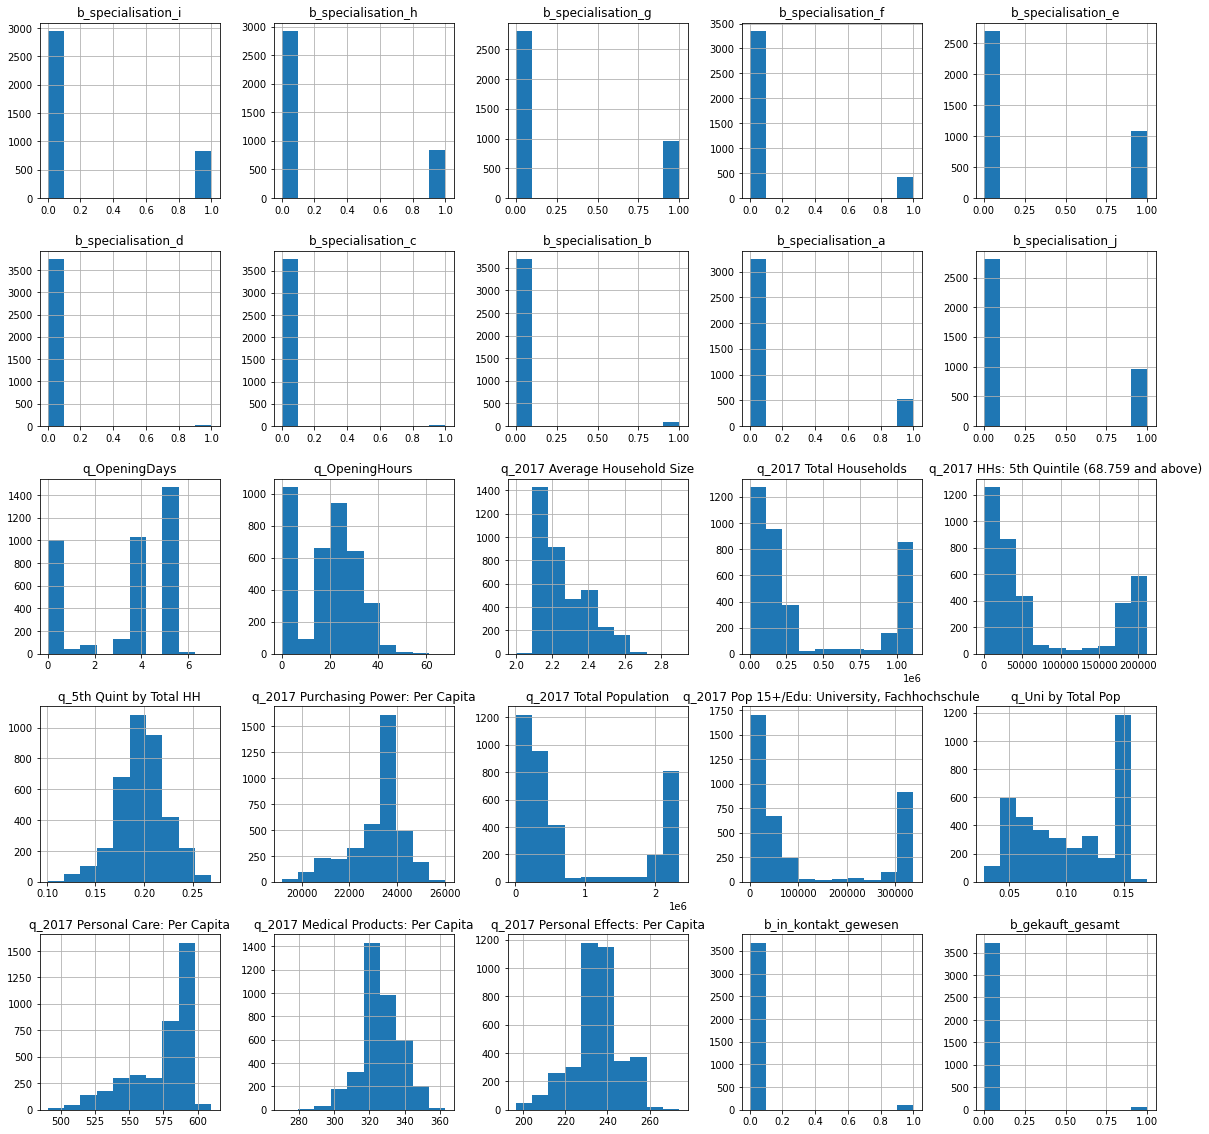

In [5]:
# Plot histograms

warnings.filterwarnings('ignore')
fig = plt.figure(figsize = (20,20))
ax = fig.gca()
df_num.hist(ax = ax);

* There are no heavily right skewed distributions
* There are no extreme outliers

* What can be said about the specialisations? To have a closer look, the amount of all different specialisations are calculated and secondly, the amount of number of specialisations per observation is shown

In [6]:
# Specialisations: Amount of all different specialisations

df.iloc[:,1:11].sum().sort_values(ascending=False)

b_specialisation_e    1077
b_specialisation_g     961
b_specialisation_j     959
b_specialisation_h     846
b_specialisation_i     823
b_specialisation_a     523
b_specialisation_f     421
b_specialisation_b      77
b_specialisation_d      21
b_specialisation_c      10
dtype: int64

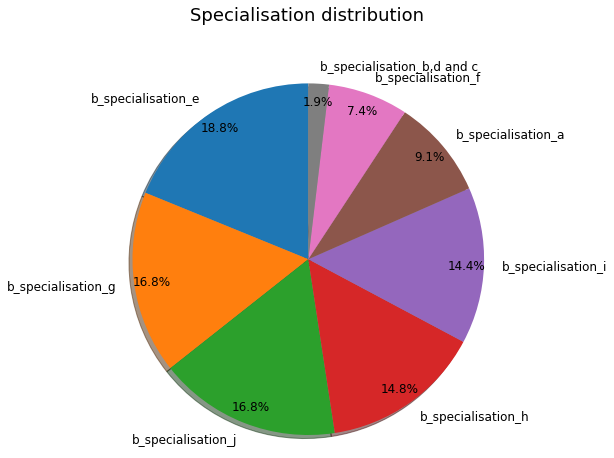

In [7]:
# Pie chart

specs = df.iloc[:,1:11].sum().sort_values(ascending=False)
specs["b_specialisation_b,d and c"] = sum(specs[-3:])
specs.drop(["b_specialisation_b","b_specialisation_d","b_specialisation_c"], inplace=True)
fig1, ax1 = plt.subplots(figsize=(7,7))

ax1.pie(specs, labels=specs.index, autopct='%1.1f%%',
        shadow=True, startangle=90, textprops={'fontsize': 12}, pctdistance=0.9, labeldistance=1.1)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title("Specialisation distribution", pad=50, fontsize=18)
plt.show()

In [8]:
# Specialisations: How many times 0, 1, 3, etc. specialisations are found?

print(df_num.iloc[:,1:11].sum(axis=1).value_counts())
print("About " + str(round((df_num.iloc[:,1:11].sum(axis=1).value_counts()[0] + df_num.iloc[:,1:11].sum(axis=1).value_counts()[1]) / df_num.shape[0] * 100,2)) + " of all observations have either zero or one specialisations.")

0    1279
1    1052
2     490
3     429
4     290
5     176
6      46
7       7
8       2
9       2
dtype: int64
About 61.78 of all observations have either zero or one specialisations.


* The numbers of different specialisations might be an important feature, too. This feature engineering step is described in the following section

In [50]:
# Feature engineering: Add number of different specialisations as *spec_number*

df_num["spec_number"] = df_num.iloc[:,1:11].sum(axis=1)

* As a final step in this EDA, the mean values of all features between bought and not bought observations of contacted are compared

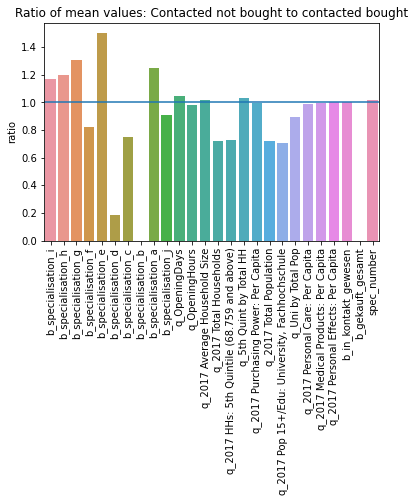

In [51]:
# Create two tables from all *b_in_kontakt_gewesen* equal to 1: *b_gekauft_gesamt* = 0 and *b_gekauft_gesamt* = 1

df_buy = df_num.query("b_gekauft_gesamt == 1")
df_notbuy = df_num.query("b_gekauft_gesamt == 0 & b_in_kontakt_gewesen == 1")

# These two tables with all the mean values are concatenated

df_compare = pd.concat([df_buy.describe().loc["mean"],df_notbuy.describe().loc["mean"]], axis=1, keys=["mean_buy","mean_notbuy"])

# Additionally, a further column showing the ratio is added

df_compare.eval("ratio = mean_notbuy / mean_buy", inplace=True)

# Barplot
sns.barplot(data=df_compare,y="ratio",x=df_compare.index)
plt.title("Ratio of mean values: Contacted not bought to contacted bought")
plt.axhline(1)
plt.xticks(rotation=90);

* What is shown here? The horizontal line marks the ratio of one. All features above one indicate that on average, they were higher in the case in which the customer did not buy the product. All features below the line were higher on average in the cases the customer decided to buy.
* Lower values for all *q_2017 Total Households*, *q_2017 HHs: 5th Quintile*, *q_2017 Total Population*, *q_2017 Pop 15+/Edu: University, Fachhochschule* leads to fewer purchases
* There are some features that could indicate a inclination towards buying / not buying. E.g. *b_specialisation_e* and *b_specialisation_d*. Especially *b_specialisation_d* shows only one case in which the customer decided not to buy versus eight cases in which the customer bought. However, the numbers are too small to draw a firm conclusion

In [52]:
df_buy["b_specialisation_d"].sum()
df_notbuy["b_specialisation_d"].sum()

print(f"Between all the contacted entities, {df_buy.b_specialisation_d.sum()} with b_specialisation_d bought and {df_notbuy.b_specialisation_d.sum()} did not buy.")

Between all the contacted entities, 8 with b_specialisation_d bought and 1 did not buy.


### Correlations
------

* In order to withdraw highly correlated features, the [correlation matrix](https://en.wikipedia.org/wiki/Correlation) is plotted. The lower triangle is redundand and the diagonal values are always one, thus both parts are negligible

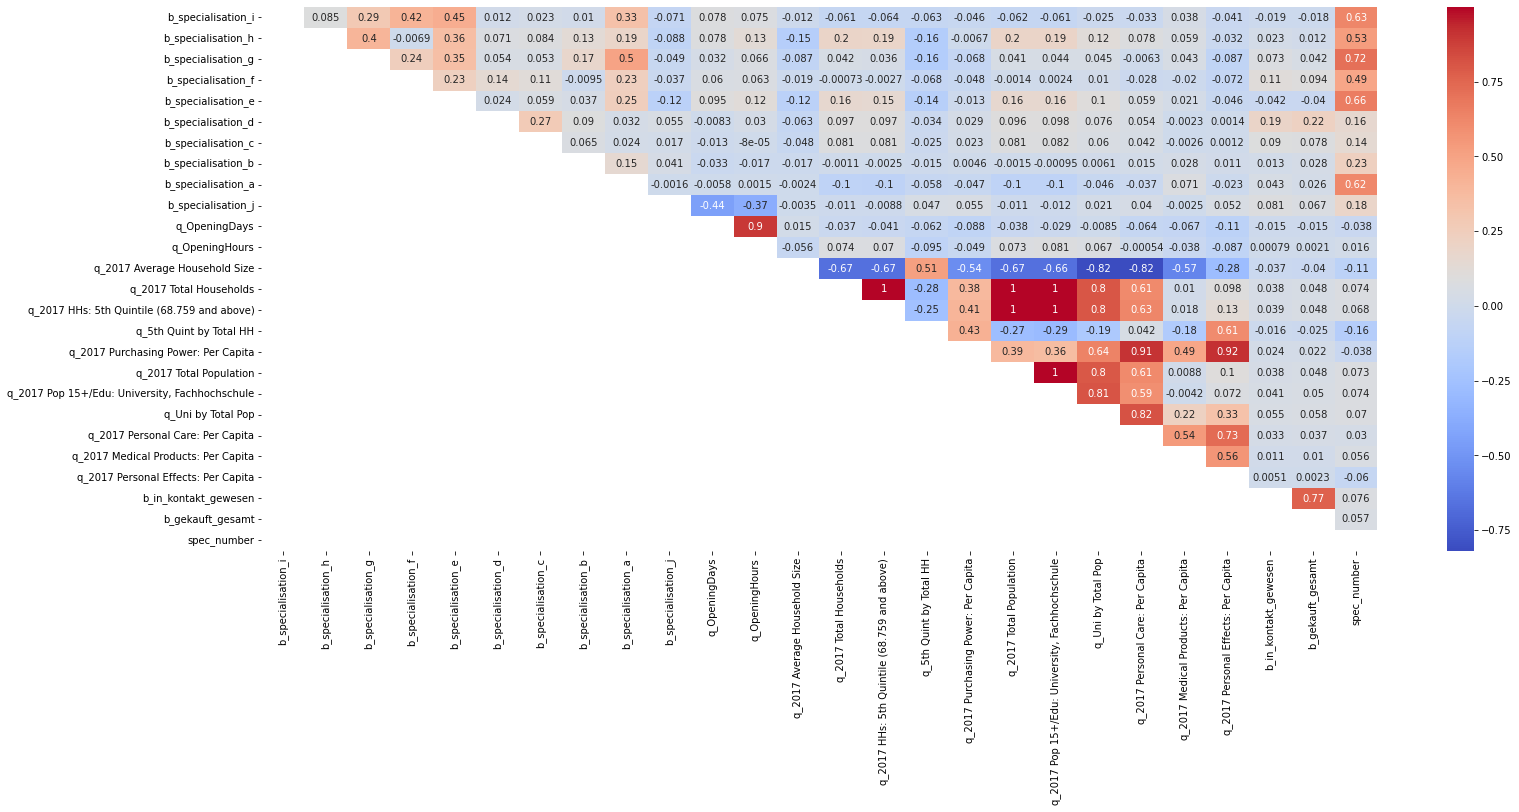

In [53]:
# Plot the correlation matrix using all features

correlation_matrix = df_num.corr()
upper = correlation_matrix.where(np.triu(np.ones(correlation_matrix.shape), k=1).astype(np.bool))
plt.figure(figsize=(25,10))
sns.heatmap(upper, cmap="coolwarm", annot=True)
plt.show()

* Some correlations are 1. One of these columns have to be dropped. The threshold of high correlation is usually 0.95. In this case, the training data set is very small, which means fewer features are vital for a proper model. The threshold is therefore changed to 0.85.

In [56]:
# Identidy high correlation and save the column names as *to_drop*

to_drop = [column for column in upper.columns if any(upper[column] > 0.85)]

# Drop features 
df_dropped_corr = df_num.drop(to_drop, axis=1)

* Show the correlation matrix to doublecheck

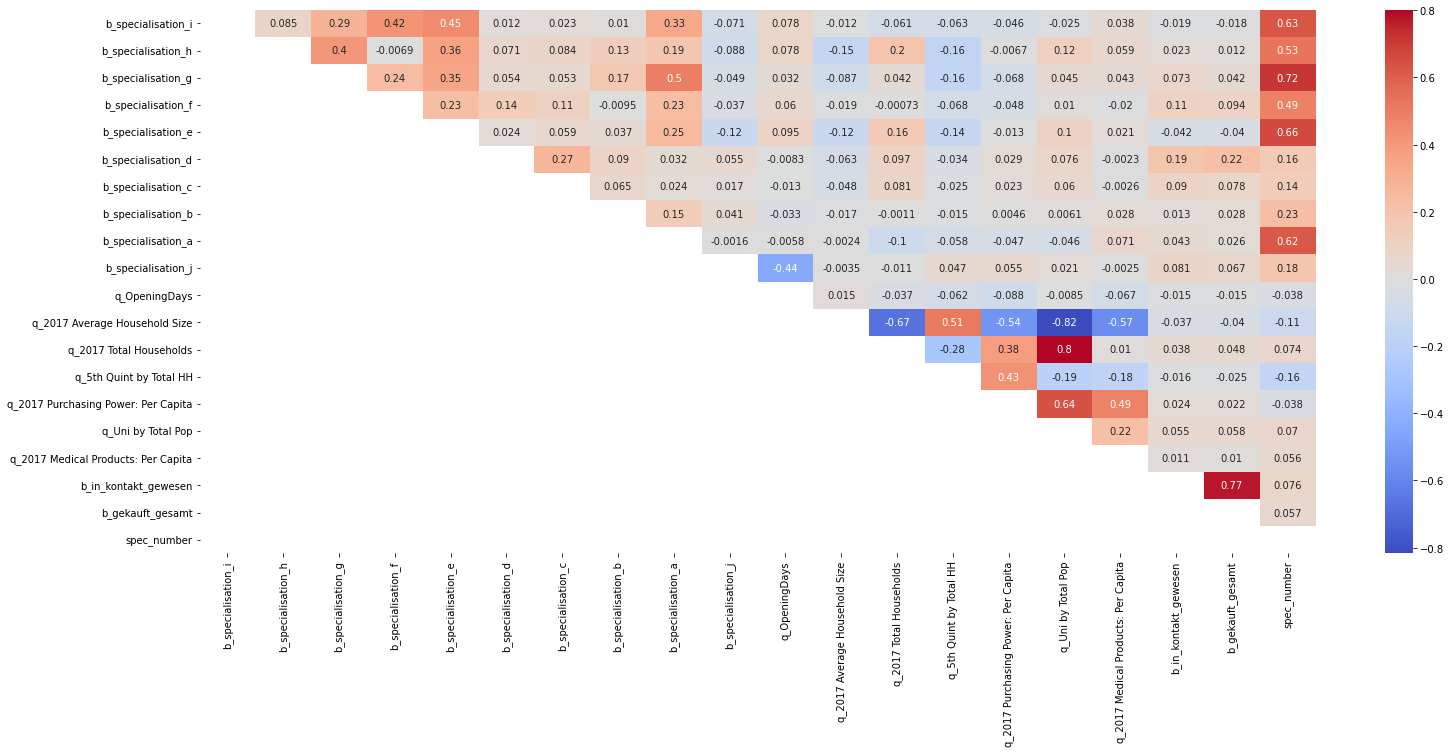

In [57]:
# Show correlation matrix again, now without already dropped features

correlation_matrix = df_dropped_corr.corr()
upper = correlation_matrix.where(np.triu(np.ones(correlation_matrix.shape), k=1).astype(np.bool))
plt.figure(figsize=(25,10))
sns.heatmap(upper, cmap="coolwarm", annot=True)
plt.show()

### Export clean data
------

In [58]:
df_dropped_corr.to_csv("data/CustomerData_clean.csv", index=False)